In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

FIGSIZE = (15, 15)

## Part 1: Types of Images & Color Spaces

### Load image `flowers.bmp` and display it

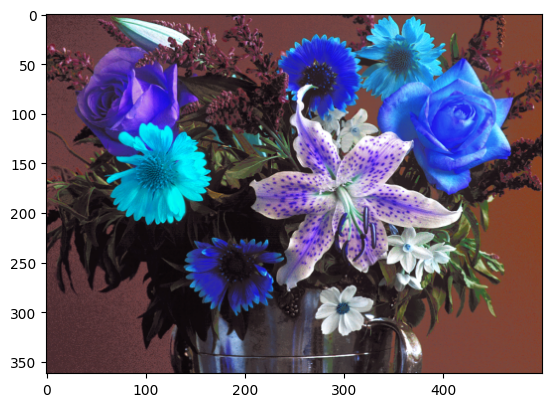

In [2]:
import os
flowers = cv2.imread('images/flowers.bmp')
plt.imshow(flowers)
plt.show()

### Display image dimensions

In [3]:
flowers.shape

(362, 500, 3)

### Display the three channels (R, G, B) of the image separately
  
**Approacch 1**: iterating over the channels by index. **Note**: By defauld, the `imread()` function decodes the image into a matrix, with the color channels saved in the following order: **blue, green, red (BGR)**

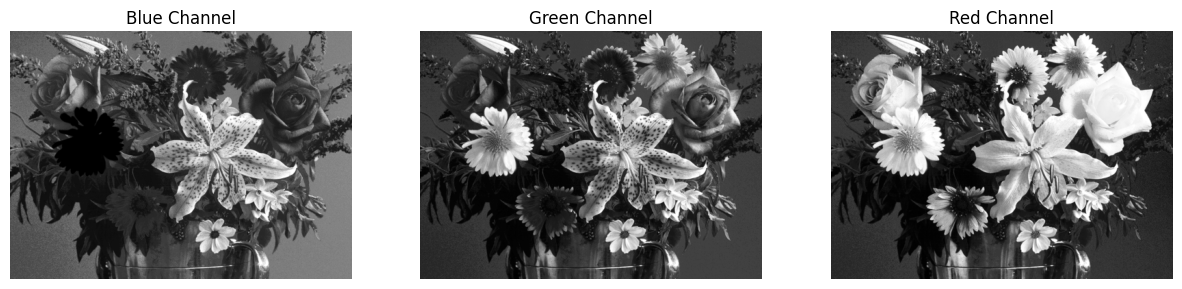

In [4]:
# img[:,:,0] ==> Blue Channel
# img[:,:,1] ==> Green Channel
# img[:,:,2] ==> Red Channel
index_bgr_map = {
  0 : "Blue",
  1 : "Green",
  2 : "Red"
}

_, plots = plt.subplots(ncols=3, nrows=1, figsize=(15, 15))
for i, subplot in zip(range(3), plots):
  img = flowers[:,:,i]
  subplot.set_title("%s Channel" % index_bgr_map[i])
  subplot.imshow(img, cmap='gray')
  subplot.set_axis_off()
#plt.show()

   **Approach 2**: Using `cv2.split()`

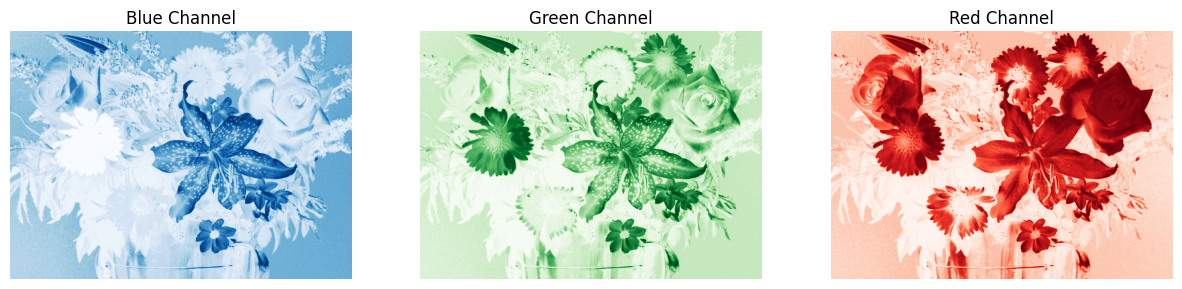

In [5]:
blue, green, red = cv2.split(flowers)
_, axis = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
axis[0].set_title("Blue Channel")
axis[0].imshow(blue, cmap='Blues')
axis[0].set_axis_off()
axis[1].set_title("Green Channel")
axis[1].imshow(green, cmap='Greens')
axis[1].set_axis_off()
axis[2].set_title("Red Channel")
axis[2].imshow(red, cmap='Reds')
axis[2].set_axis_off()

### Convert image to HSV and display the three HSV channels

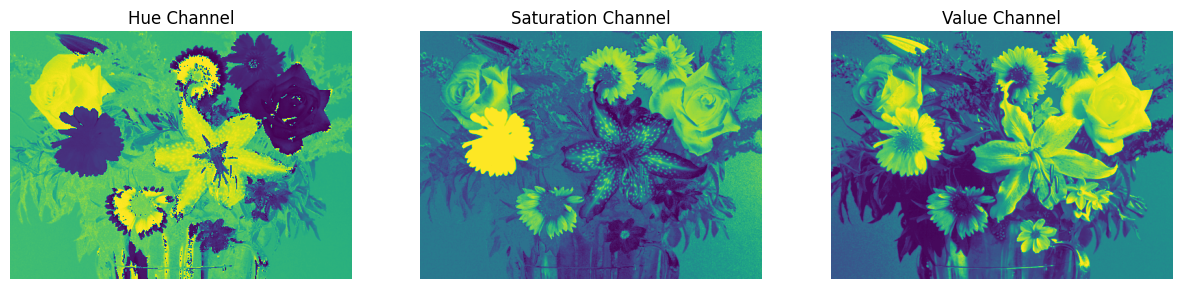

In [6]:
flowers_hsv = cv2.cvtColor(flowers, cv2.COLOR_BGR2HSV)
index_hsv_map = {
  0 : 'Hue',
  1 : 'Saturation',
  2 : 'Value'
}
_, plots = plt.subplots(nrows=1, ncols=3, figsize=FIGSIZE)
for i, plot in zip(range(3), plots):
  img = flowers_hsv[:,:,i]
  plot.set_title("%s Channel" % index_hsv_map[i])
  plot.imshow(img)
  plot.set_axis_off()

### Convert image to Grayscale and display it
**Note:** Grayscaling is the process of converting an image from other color spaces e.g. RGB, CMYK, HSV, etc. to shades of gray. It varies between complete black and complete white. [ref](https://www.geeksforgeeks.org/python-grayscaling-of-images-using-opencv/)

An intuitive way to convert a color image 3D array to a grayscale 2D array is, for each pixel, take the average of the red, green, and blue pixel values to get the grayscale value. [ref](https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://e2eml.school/convert_rgb_to_grayscale&ved=2ahUKEwi-hNOh8L2IAxXQ2QIHHSMJBgEQFnoECBkQAw&usg=AOvVaw0pnUZTcSTST7Lw0HUxNlll)

Grayscale image dimensions : (362, 500)


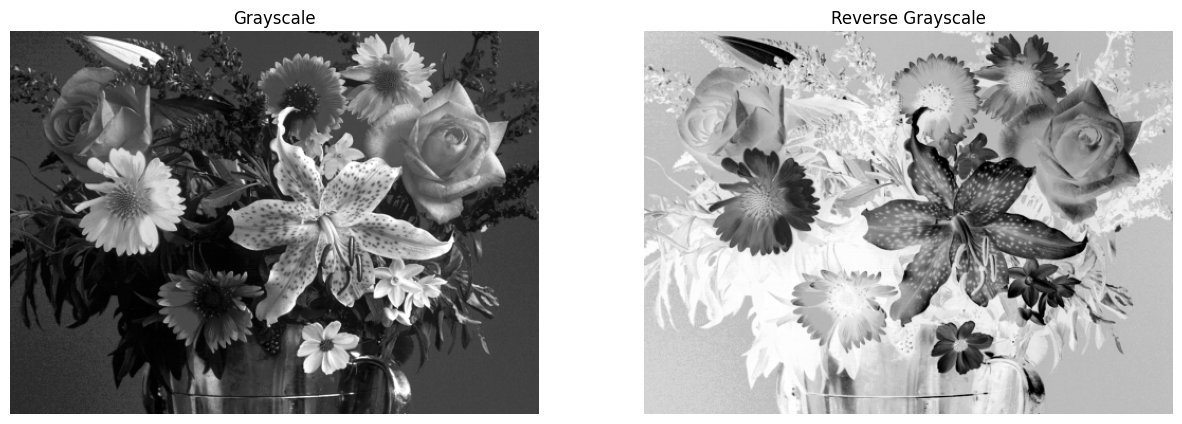

In [7]:
flowers_gray = cv2.cvtColor(flowers, cv2.COLOR_BGR2GRAY)
_, plots = plt.subplots(nrows=1, ncols=2, figsize=FIGSIZE)
plots[0].set_title("Grayscale")
plots[0].imshow(flowers_gray, cmap='gray')
plots[0].set_axis_off()
plots[1].set_title("Reverse Grayscale")
plots[1].imshow(flowers_gray, cmap='gray_r')
plots[1].set_axis_off()
print(f"Grayscale image dimensions : {flowers_gray.shape}")

### Convert grayscale image to binary

**Approach 1**: Writing our own function

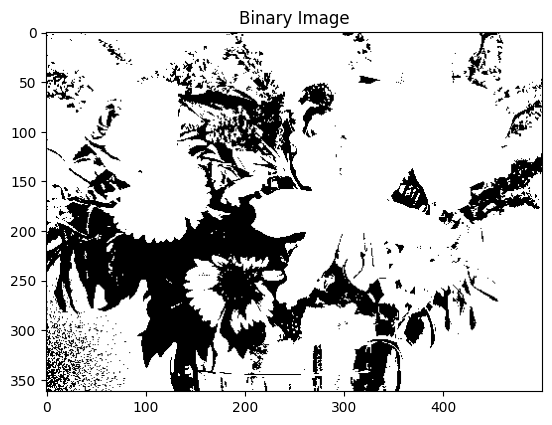

In [8]:
def segment_image(image, threshold):
  dimensions = image.shape
  for r in range(dimensions[0]):
    for c in range(dimensions[1]):
      if image[r][c] <= threshold:
        image[r][c] = 0
      else:
        image[r][c] = 255

flowers_gray_2 = flowers_gray[:,:]
segment_image(flowers_gray_2, 50)
plt.title("Binary Image")
plt.imshow(flowers_gray_2, cmap='gray')

**Apporach 2**: using `cv2.threshold`
 
**Syntax**: `cv2.threshold(source, thresholdValue, maxVal, thresholdingTechnique)`

**Parameters**: 
- -> source: Input Image array (must be in Grayscale). 
- -> thresholdValue: Value of Threshold below and above which pixel values will change accordingly. 
- -> maxVal: Maximum value that can be assigned to a pixel. 
- -> thresholdingTechnique: The type of thresholding to be applied. 

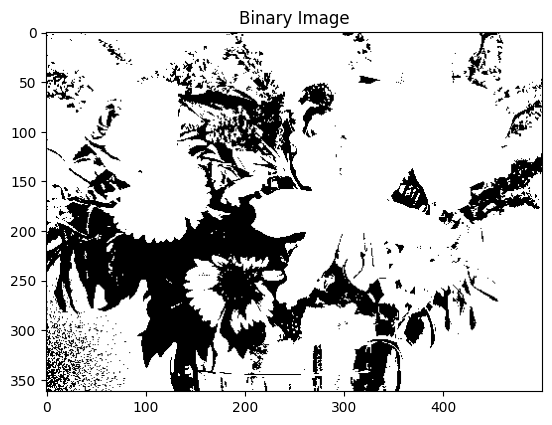

In [9]:
(thresh, im_bw) = cv2.threshold(flowers_gray, 50, 255, cv2.THRESH_BINARY)
plt.title("Binary Image")
plt.imshow(im_bw, cmap='gray')

### Convert grayscale image to binary using Otsu method

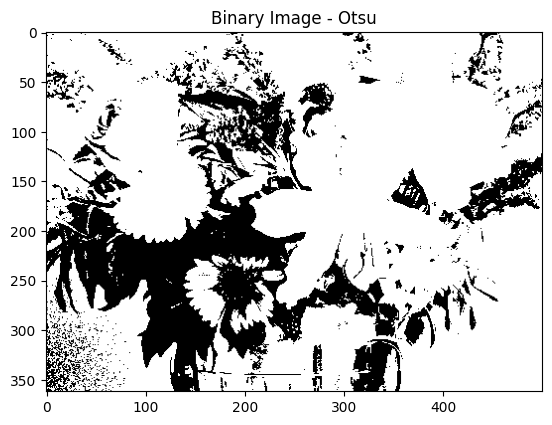

====> Together:


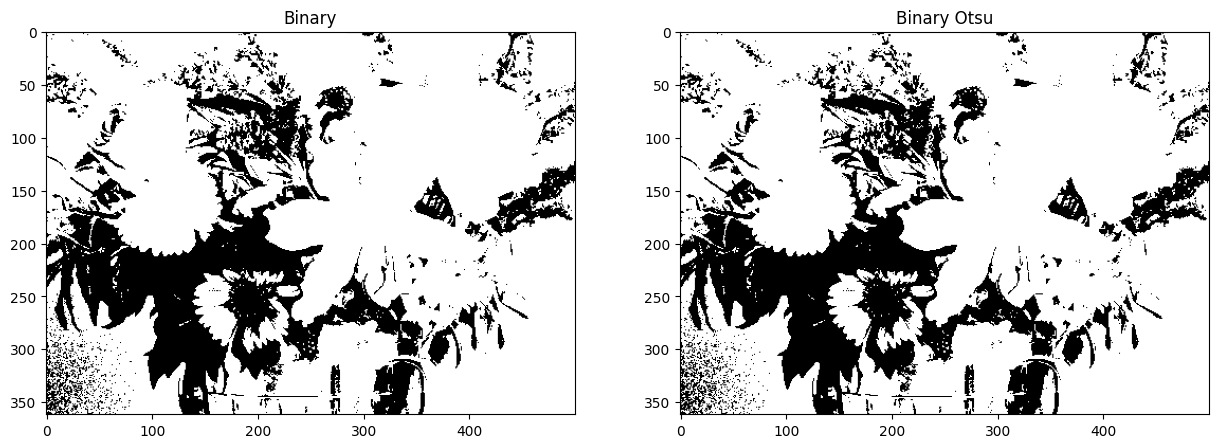

In [10]:
(_, im_bw_otsu) = cv2.threshold(flowers_gray, 10, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.title("Binary Image - Otsu")
plt.imshow(im_bw_otsu, cmap='gray')
plt.show()

print("====> Together:")
_, plots = plt.subplots(nrows=1, ncols=2, figsize=FIGSIZE)
plots[0].set_title("Binary")
plots[0].imshow(im_bw, cmap='gray')
plots[1].set_title("Binary Otsu")
plots[1].imshow(im_bw_otsu, cmap='gray')

## Part 2: Histograms & Intensity Transformation

### Load and display the histogram of `Goldhill.bmp`

**Nore:** Histogram is considered as a graph or plot which is related to frequency of pixels in an Gray Scale Image with pixel values (ranging from 0 to 255). [ref](https://www.geeksforgeeks.org/opencv-python-program-analyze-image-using-histogram/)

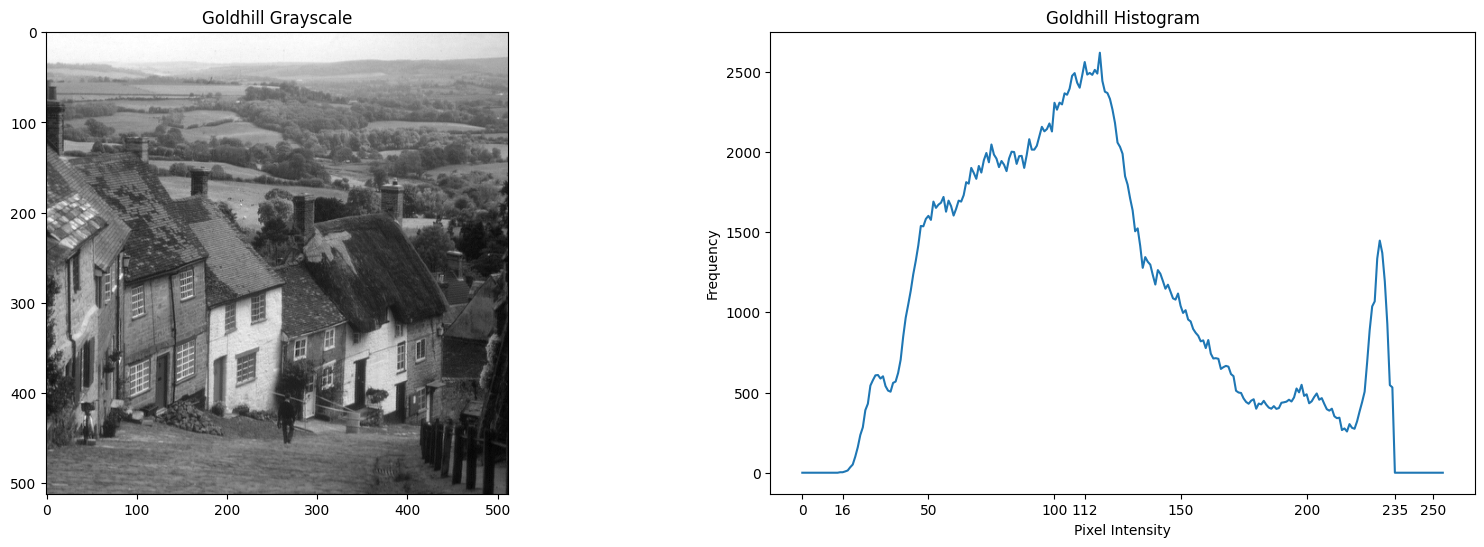

In [11]:
goldhill_gray = cv2.imread("images/Goldhill.bmp", cv2.IMREAD_GRAYSCALE)

goldhill_histogram = cv2.calcHist([goldhill_gray], [0], None, [255], [0, 256])

_, plots = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

plots[0].set_title("Goldhill Grayscale")
plots[0].imshow(goldhill_gray, cmap='gray')
plots[1].set_title("Goldhill Histogram")
plots[1].plot(goldhill_histogram)
plots[1].set_xticks(list(range(0, 300, 50)) + [goldhill_gray.flatten().max(), goldhill_gray.flatten().min(), round(goldhill_gray.flatten().mean())])
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

### Load and display the histogram of `BaboonRGB.bmp` for each color channel

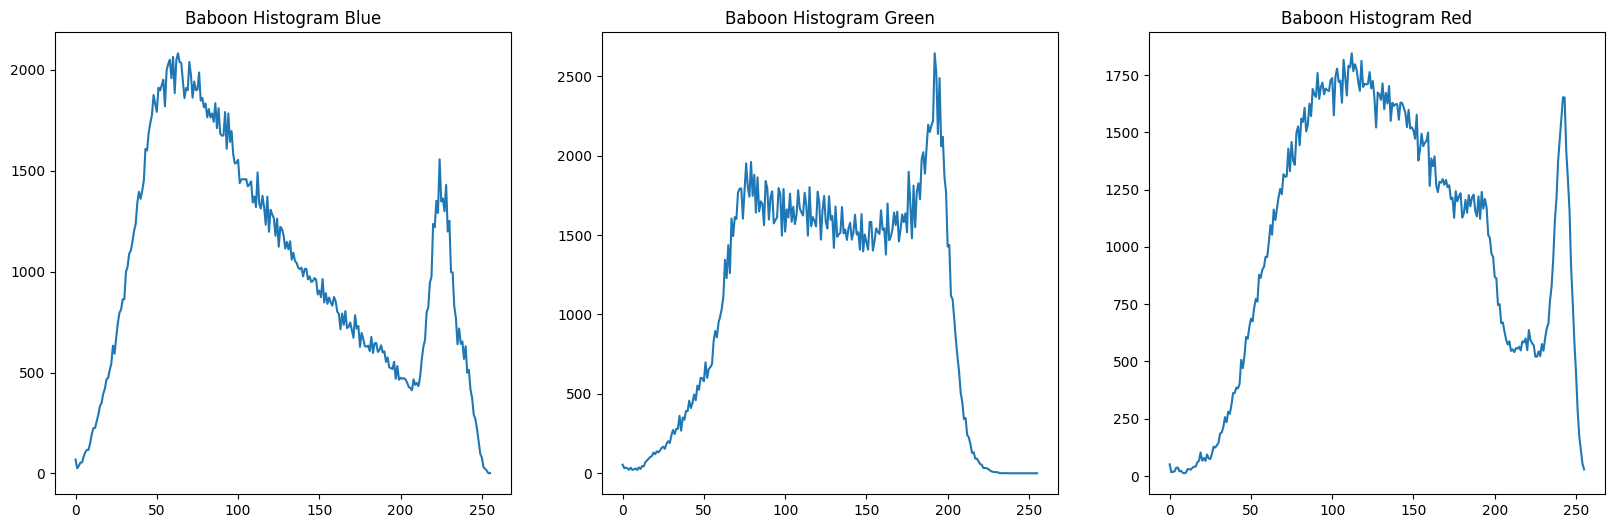

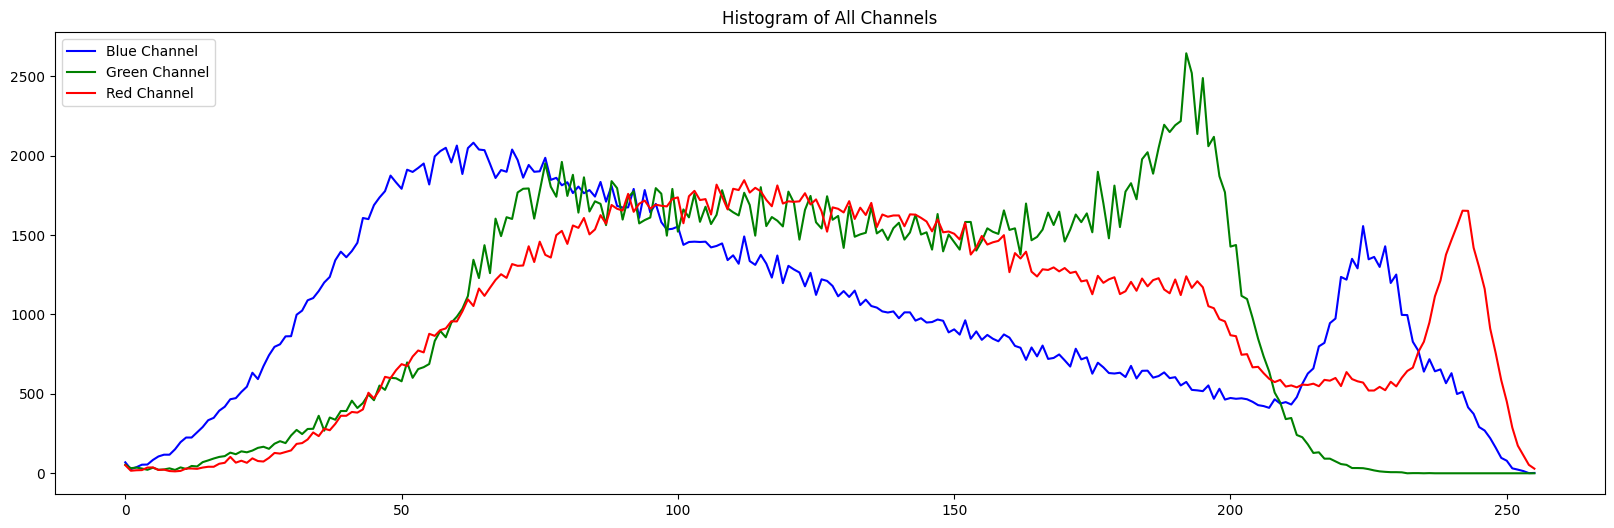

In [12]:
baboon_bgr = cv2.imread("images/BaboonRGB.bmp")

baboon_hist_blue = cv2.calcHist([baboon_bgr], [0], None, [256], [0, 256])
baboon_hist_green = cv2.calcHist([baboon_bgr], [1], None, [256], [0, 256])
baboon_hist_red = cv2.calcHist([baboon_bgr], [2], None, [256], [0, 256])

# Plotting
_, plots = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
plots[0].plot(baboon_hist_blue)
plots[0].set_title("Baboon Histogram Blue")
plots[1].plot(baboon_hist_green)
plots[1].set_title("Baboon Histogram Green")
plots[2].plot(baboon_hist_red)
plots[2].set_title("Baboon Histogram Red")
plt.show()

# All Together
plt.figure(figsize=(20, 6))
plt.title("Histogram of All Channels")
plt.plot(baboon_hist_blue, "b", label="Blue Channel")
plt.plot(baboon_hist_green, "g", label="Green Channel")
plt.plot(baboon_hist_red, "-r", label="Red Channel")
plt.legend(loc="upper left")
plt.show()

### Apply the flollowing intensity transformations on image `boatscontrast.bmp`:
- Negative Transformation
- Log Transformation
- Power-law Transformations (Gamma Correction)
- Histogram Equalization

In [13]:
boatscontrast_bmp = cv2.imread("images/boatscontrast.bmp")

#### 1. Negative Transformation

The negative transformation is achieved by taking the complement of the original pixel intensity values. [ref](https://medium.com/@khanhson0811/basic-intensity-transformation-functions-and-example-with-opencv-1a56932f34ac)

s = L - 1 - r  (L: Maximum intenshit leve, often 255 in the case of 8-bit images)

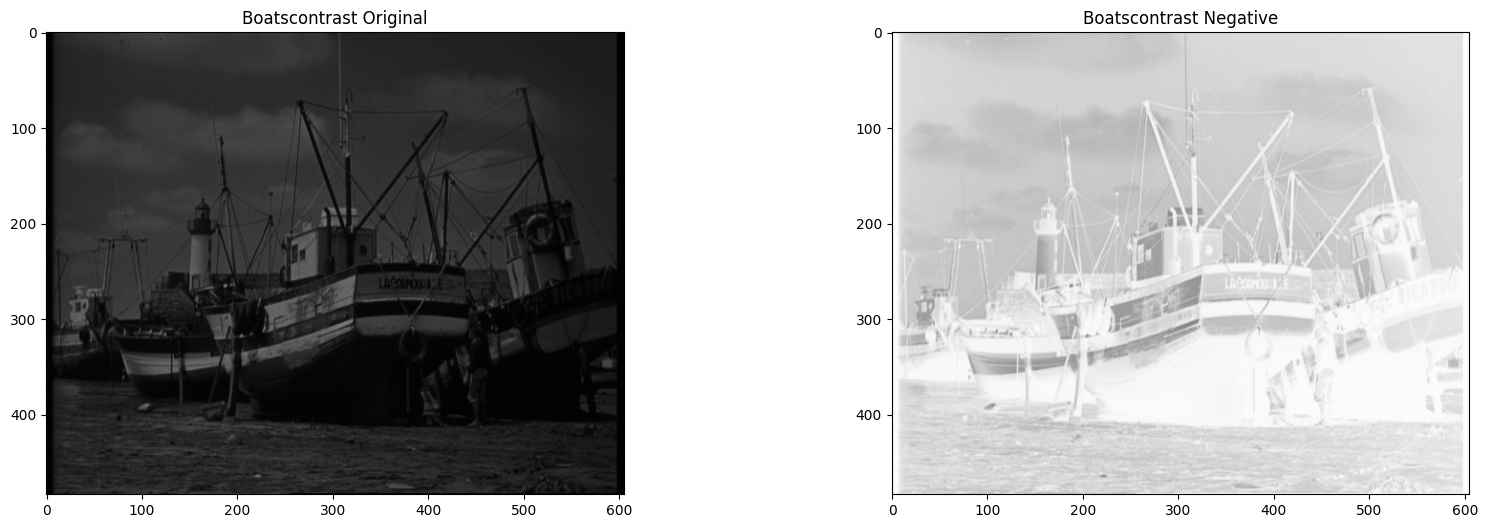

In [14]:
boatscontrast_neg = 255 - 1 - boatscontrast_bmp

_, plots = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
plots[0].imshow(boatscontrast_bmp)
plots[0].set_title("Boatscontrast Original")
plots[1].imshow(boatscontrast_neg)
plots[1].set_title("Boatscontrast Negative")
plt.show()

#### 2. Log Transformation
Logarithmic transformations in image processing are a group of nonlinear intensity adjustments aimed at **enhancing the visibility of details** in images.[ref](https://medium.com/@khanhson0811/basic-intensity-transformation-functions-and-example-with-opencv-1a56932f34ac)

Log Transformation: `S = c.log(1 + R)`

- S represents the transformed pixel value.
- R is the original pixel value.
- c is a constant that adjusts the degree of enhancement.
- The logarithm function compresses high-intensity values and stretches low-intensity values.


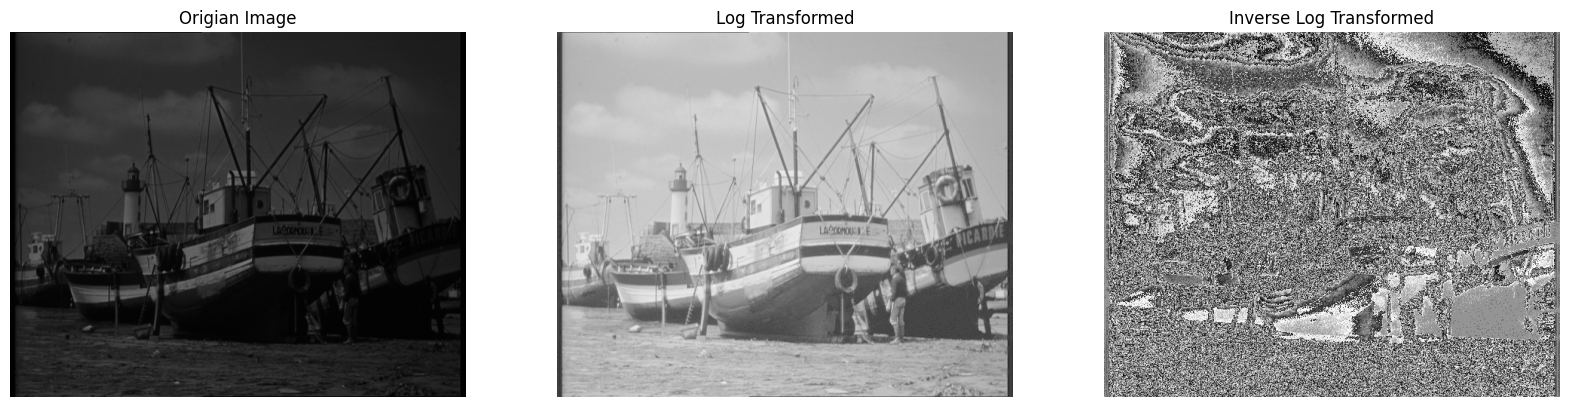

In [15]:
c = 50  # Fixed by us

# Log Transformation
boatscontrast_log_transformed = c * (np.log(boatscontrast_bmp + 1))

# Convert to 8-bit unsigned integer format
boatscontrast_log_transformed = np.uint8(boatscontrast_log_transformed)

# Inverse-Log Transformation
boatscontrast_inverse_log_transformed = c * (np.exp(boatscontrast_log_transformed / c) - 1)

# Convert to 8-bit unsigned integer
boatscontrast_inverse_log_transformed = np.uint8(boatscontrast_inverse_log_transformed)

# Display the original and the transformed images
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(boatscontrast_bmp, cv2.COLOR_BGR2RGB))
plt.title("Origian Image")
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(boatscontrast_log_transformed, cv2.COLOR_BGR2RGB))
plt.title("Log Transformed")
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(boatscontrast_inverse_log_transformed, cv2.COLOR_BGR2RGB))
plt.title("Inverse Log Transformed")
plt.axis('off')
plt.show()


#### 3. Power-law Transformation (Gamma Transformation)

Power-law transformations, also known as gamma correction, are a class of mathematical transformations used to **adjust the tonal and brightness** characteristics of an image.[ref](https://medium.com/@khanhson0811/basic-intensity-transformation-functions-and-example-with-opencv-1a56932f34ac)


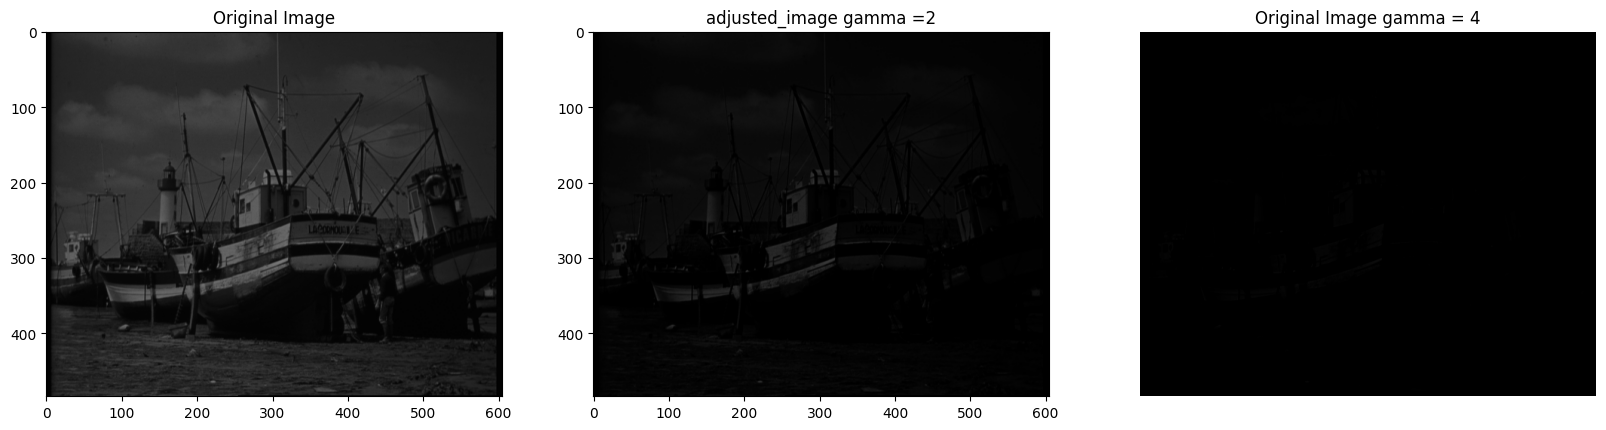

In [16]:
gamma = 2
gamma2=4

boatscontrast_adjusted = np.power(boatscontrast_bmp / 255.0, gamma) * 255.0
boatscontrast_adjusted = boatscontrast_adjusted.astype(np.uint8)
boatscontrast_adjusted2 = np.power(boatscontrast_bmp / 255.0, gamma2) * 255.0
boatscontrast_adjusted2 = boatscontrast_adjusted2.astype(np.uint8)

plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1) 
plt.imshow(cv2.cvtColor(boatscontrast_bmp, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(boatscontrast_adjusted, cv2.COLOR_BGR2RGB))
plt.title("adjusted_image gamma =2")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(boatscontrast_adjusted2, cv2.COLOR_BGR2RGB))
plt.title("Original Image gamma = 4")
plt.axis('off')
plt.show()

#### 4. Histogram Equialization

Histogram equalization is a method in image processing of **contrast adjustment** using the image’s histogram. This method usually **increases the global contrast of many images**, especially when the usable data of the image is represented by close contrast values. [ref](https://www.geeksforgeeks.org/histograms-equalization-opencv/)

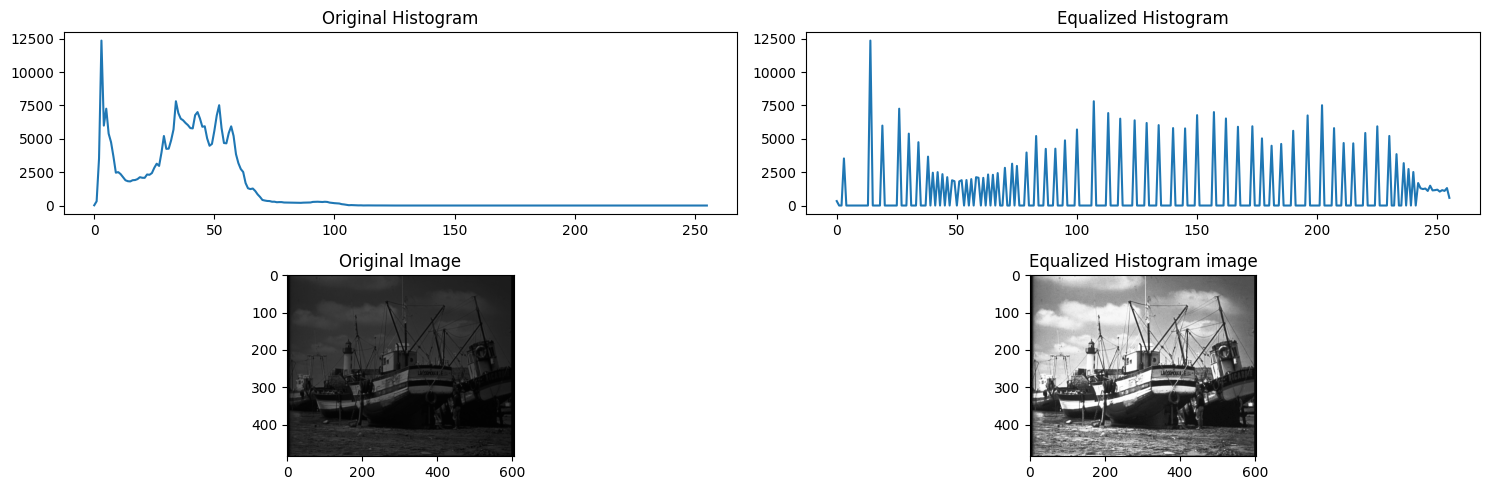

In [17]:
boatscontrast_hist = cv2.calcHist([boatscontrast_bmp], [0], None, [256], [0, 256]) 
boatscontrast_equ_hist = cv2.equalizeHist(boatscontrast_bmp[:,:,0])

equ_hist = cv2.calcHist([boatscontrast_equ_hist], [0], None, [256], [0, 256]) 

plt.figure(figsize=(15, 5))
plt.subplot(2, 2, 3)
plt.title("Original Image")
plt.imshow(boatscontrast_bmp, cmap='gray')

plt.subplot(2, 2, 4)
plt.title("Equalized Histogram image")
plt.imshow(boatscontrast_equ_hist, cmap='gray')

plt.subplot(2, 2, 1)
plt.title("Original Histogram")
plt.plot(boatscontrast_hist)

plt.subplot(2, 2, 2)
plt.title("Equalized Histogram")
plt.plot(equ_hist)

plt.tight_layout()  # For better display
plt.show()

### Claculate Image Contrast

In [18]:
from PIL import Image as im
# Michelson Contrast
Imax = boatscontrast_bmp.max()
Imin = boatscontrast_bmp.min()
contrast = (Imax - Imin) / (Imax + Imin)
print(f"Michelson Contrast {contrast}")

# RMS Contrast
def rms_contrast():
  M = boatscontrast_bmp.shape[0]
  N = boatscontrast_bmp.shape[1]
  avg = boatscontrast_bmp.mean()
  sum1 = 0
  for r in range(len(boatscontrast_bmp[:,:,0])):
    for c in range(len(boatscontrast_bmp[r,:,0])):
      sum1 += np.square(boatscontrast_bmp[r,c,0] - avg)
  return np.sqrt((1/(M*N)) * sum1)

print(f"RMS Contrast {rms_contrast()}")

Michelson Contrast 1.0
RMS Contrast 19.920888790383366
